In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib
import math
from matplotlib import colors as mcolors
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
# Load the txt-files with with stats from the st-pipeline

path = '../../smomics_data'

filez = ['10015CN108_C1_genes_after_seq_depth_in_spots_under_outside_tissue.txt',
         '10015CN108fl_E2_genes_after_seq_depth_in_spots_under_outside_tissue.txt',
         '5005CN107_D2_genes_after_seq_depth_in_spots_under_outside_tissue.txt',
        'visium_A1_genes_after_seq_depth_in_spots_under_outside_tissue.txt', 
        'visium_B1_genes_after_seq_depth_in_spots_under_outside_tissue.txt', 
        'visium_D1_genes_after_seq_depth_in_spots_under_outside_tissue.txt']

sample_type = {'visium_A1':'Visium',
              'visium_B1':'Visium',
               'visium_D1':'Visium',
              '10015CN108_C1': 'sm-omics',
              '10015CN108fl_E2': 'sm-omics',
              '5005CN107_D2': 'sm-omics'}

stats_list = []

prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

for file in filez:
    filename = os.path.join(path, file)
    
    cond_file = pd.read_csv(filename, sep = '\t')
    print(cond_file)
         
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
        
    cond_file['type'] = sample_type[cond_file['Name'][0]]
    
    # normalize uniq counts with # spots under tissue and spot area
    cond_file['norm uniq gen inside'] = cond_file['Genes inside']
    cond_file['norm uniq gen outside'] = cond_file['Genes outside']
        
    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    
print(cond_merge.head())

# Print max value (at  Prop_annot_reads == 1)
print(cond_merge[cond_merge['Prop_annot_reads'] == 1])

            Name  Genes inside  Genes outside  Annot reads  Num reads
0  10015CN108_C1    871.460317     302.143312      2336977    4498459
1  10015CN108_C1    871.848485     302.872611      2337129   16217182
2  10015CN108_C1    551.360750     184.452229      1383068    2545338
3  10015CN108_C1    340.750361     107.907643       853129    1568778
4  10015CN108_C1    112.992785       3.457962       332632     611749
5  10015CN108_C1    871.265512     302.242038      2337203    8404700
6  10015CN108_C1    154.336219      49.156051       428272     787530
7  10015CN108_C1    871.790765     302.738854      2337226   20123423
8  10015CN108_C1    871.725830     302.305732      2337217   12310941
              Name  Genes inside  Genes outside  Annot reads  Num reads
0  10015CN108fl_E2   1154.348754     197.807512      3015899    6033647
1  10015CN108fl_E2   1183.000000     204.311475      3108801   59887074
2  10015CN108fl_E2    616.375445     102.906475      1518770    3041790
3  10015CN10

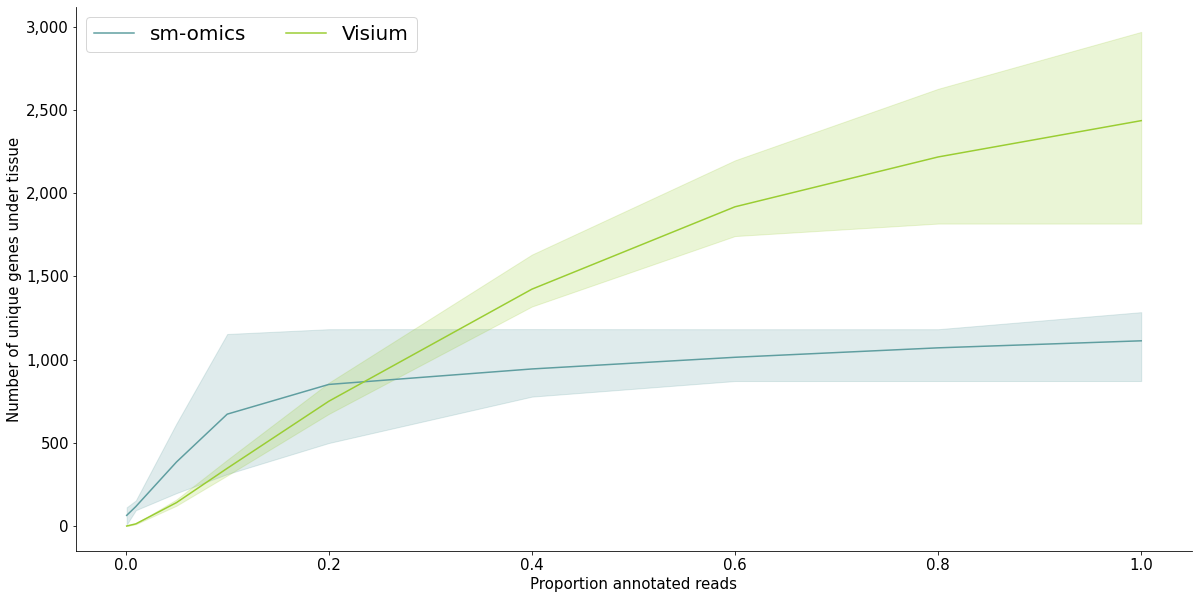

In [5]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq gen inside"
#y="Genes"
hue='type'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette = ['cadetblue', 'yellowgreen'], hue_order = ['sm-omics', 'Visium'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique genes under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'Visium'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_visium_total_genes_inside.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [6]:
cond_merge['Prop_annot_reads'] = 100*cond_merge['Prop_annot_reads']

In [7]:
cond_merge.to_csv('../../smomics_data/sm_visium_unique_genes_under_outside_tissue.csv')